# Does Putting Girls in School for Longer Make Everyone Happier?
## By Anna Munter

I am curious about exploring the relationship between average years of schooling for women (dataset from the UNDP) and world happiness scores (dataset from Kaggle). Do these two things have any sort of relationship? Can we say that putting girls in school for longer makes a country's citizens 'happier'?

This is my first notebook and it is not yet complete. I am still exploring these questions and learning as I go along. Constructive feedback and comments welcome. 

# Loading Libraries

In [1]:
import pandas as pd #<-- Large python open-source library 
import numpy as np #<-- python language, adding support for matrices and arrays + mathematical functions
import matplotlib.pyplot as plt #<-- magic command that allows plots to be added and visualized in notebook
import seaborn as sns #<-- data viz library 
from sklearn import datasets, linear_model












# Loading and Manipulating Datasets

The datasets I will be using are: 
- [Happiness Index](https://www.kaggle.com/unsdsn/world-happiness): Survey on global happiness in 155 countries from Kaggle. The scores are based on answers to the main life evaluation question asked in the poll. This question asks people to rate their lives on a scale from 0 - 10 regarding how happy they are (10 being the best).

- [Average Years of Schooling, Female](http://hdr.undp.org/en/indicators/24106#): Taken from UNDP Human Development Reports by UNESCO Institutie for Statistics. Collection of average years of schooling for females (ages 25 and older) from 1990 - 2019 for 189 countries. 

### Happiness Index

In [2]:
#importing the csv dataset and defining the variable 
happy = pd.read_csv ('/Users...worldhappinessreport_kaggle/2019.csv')

Inspecting the dataframe

In [3]:
#a sample of the 10/155 countries listed in the happy dataset
happy.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [4]:
#general shape of the graph. note to self: this includes the header
happy.shape

(156, 9)

In [5]:
#column titles. looking at 'score' for now.
happy.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

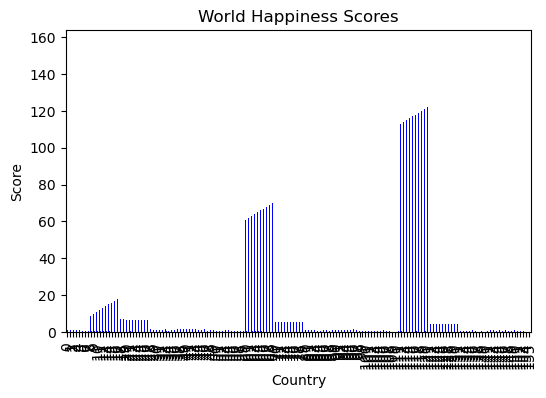

In [6]:
#altering graph and text size 
plt.rcParams['figure.dpi'] = 100 #<--only wanted my figure to appear larger without changing resolution 
plt.rcParams.update({'font.size':10})

#graphing the happy data in the bar graph
happy.plot(kind='bar',
        color='blue', legend = None)
plt.xlabel ('Country')
plt.ylabel('Score')
plt.title ('World Happiness Scores');

above graph is difficult to read, too many data points! better to choose fewer countries. 

In [7]:
#made a countries_of_interest variable. 
#these are priority countries according to Malala Fund because they are example of intended audience for this project. 
countries_of_interest = ['Afghanistan', 'Brazil', 'Ethiopia','India', 'Lebanon','Nigeria', 'Pakistan', 'Turkey']

In [8]:
#make happy1 a variable which only includes countries of interest
happy1= happy[happy['Country or region'].isin(countries_of_interest)][['Country or region', 'Score']]

In [9]:
#set happy1 dataframe and overwrote previous data frame but setting inplace = True
happy1.set_index('Country or region', inplace=True) 

In [10]:
#called happy1
happy1

,Score
Country or region,
Brazil,6.300
Pakistan,5.653
Turkey,5.373
Nigeria,5.265
Lebanon,5.197
Ethiopia,4.286
India,4.015
Afghanistan,3.203


In [11]:
#renaming the df to make 'score' --> 'happiness score', made inplace=False because did not want to overwrite df
happy1.rename(columns={'Score': 'Happiness Score'}, inplace=False) #<--{dictionary}

,Happiness Score
Country or region,
Brazil,6.300
Pakistan,5.653
Turkey,5.373
Nigeria,5.265
Lebanon,5.197
Ethiopia,4.286
India,4.015
Afghanistan,3.203


In [12]:
#looked at type of data in happy1
happy1.dtypes

Score    float64
dtype: object

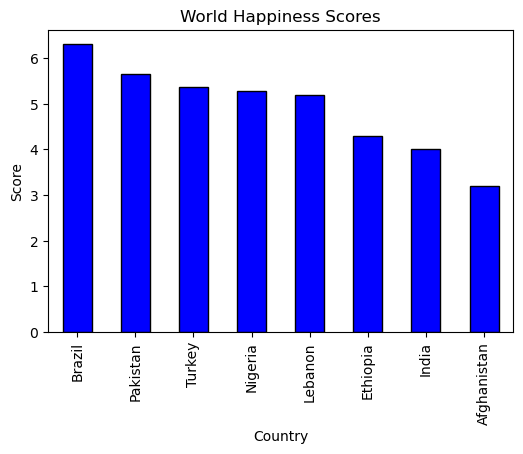

In [13]:
#altering graph and text size 
plt.rcParams['figure.dpi'] = 100 #<--only wanted my figure to appear larger without changing resolution 
plt.rcParams.update({'font.size':10})

#plotted happy data in bar graph 
happy1.plot(kind='bar', color='blue', edgecolor='black',legend = None)
plt.xlabel ('Country')
plt.ylabel('Score')
plt.title ('World Happiness Scores');

### Average Years Schooling, Female

In [14]:
#first 6 rows just includes info about the dataset, so skipped them
schooling = pd.read_csv ('/Users...years_school_female_average.csv', skiprows=6)

Inspecting the dataframe

In [15]:
schooling.head(10)

,HDI Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 16
0,169,Afghanistan,0.4,0.6,0.8,1,1.2,1.2,1.3,1.4,1.5,1.6,1.6,1.8,1.9,1.9,"a,b"
1,69,Albania,7.3,7.3,7.9,8.3,9,9.5,9.8,9.8,9.8,9.8,9.8,9.9,9.9,9.7,"b,c"
2,91,Algeria,2.2,2.9,3.8,4.8,5.8,5.8,5.8,6,6.1,7.5,7.6,7.7,7.7,7.7,"b,d"
3,36,Andorra,..,..,..,9.7,10.1,10.1,10.1,10.1,10.2,10.1,10.1,10.1,10.1,10.4,b
4,148,Angola,..,..,..,..,..,..,..,..,3.9,3.9,4,4,4,4,"b,c"
5,46,Argentina,7.9,8.4,8.7,9.7,10.4,10.4,10.5,10.5,10.5,10.5,10.6,10.7,10.7,11.1,"b,e"
6,81,Armenia,10.2,10.6,10.9,11,11.3,11.3,11.4,11.5,11.5,11.7,11.5,11.3,11.3,11.3,b
7,8,Australia,11,11.1,11.2,11.1,12.7,12.8,12.9,12.2,12.3,12.6,12.6,12.7,12.7,12.8,"b,e"
8,18,Austria,7.7,8,8.1,8.6,11.4,11.4,11.4,11.5,12.1,12.2,12.3,12.3,12.3,12.2,"b,e"
9,88,Azerbaijan,..,9.7,10,10.1,10.2,10.1,10.2,10.2,10.2,10.2,10.2,10.2,10.2,10.2,b


In [16]:
#general shape of the graph. note to self: this includes the header
schooling.shape

(216, 17)

In [17]:
#column titles
schooling.columns

Index(['HDI Rank', 'Country', '1990', '1995', '2000', '2005', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       'Unnamed: 16'],
      dtype='object')

In [18]:
#again, setting the countries_of_interest variable 
countries_of_interest = ['Afghanistan', 'Brazil', 'Ethiopia','India', 'Lebanon', 'Nigeria', 'Pakistan', 'Turkey']

In [19]:
schooling1 = schooling[schooling['Country'].isin(countries_of_interest)][['Country', '2019']]

In [20]:
#had to change the information in this df from objects to floats to then manipulate it/use a function on it 
schooling1['2019'] = schooling1['2019'].astype(float) 

In [21]:
schooling1

,Country,2019
0,Afghanistan,1.9
22,Brazil,8.2
53,Ethiopia,1.7
71,India,5.4
88,Lebanon,8.5
116,Nigeria,5.7
120,Pakistan,3.8
161,Turkey,7.3


In [22]:
#renaming dataframe to just include 2019 column --> Average Years Schooling, Female 
schooling1.rename(columns={'2019': 'Average Years Schooling, Female'}, inplace=False) #<-- this is an index, not good practice to name

,Country,"Average Years Schooling, Female"
0,Afghanistan,1.9
22,Brazil,8.2
53,Ethiopia,1.7
71,India,5.4
88,Lebanon,8.5
116,Nigeria,5.7
120,Pakistan,3.8
161,Turkey,7.3


In [23]:
#changed the index from the numbers to the countries 
schooling1.set_index('Country', inplace = True) #set index to be country so that it will plot country = x axis, scores = y-axis

In [24]:
schooling1.dtypes

2019    float64
dtype: object

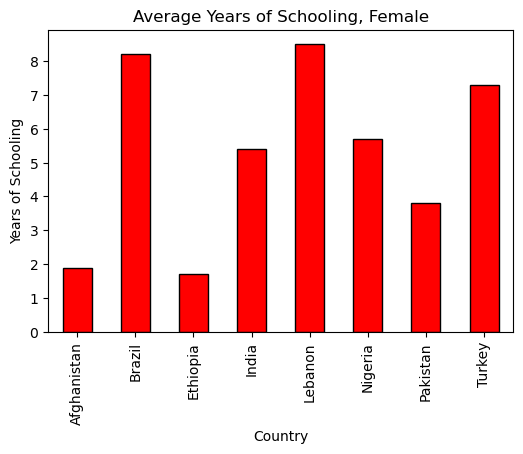

In [25]:
#Altering graph and text size 
plt.rcParams['figure.dpi'] = 100 #<--only wanted my figure to appear larger without changing resolution 
plt.rcParams.update({'font.size':10})

#ploting the schooling data in a bargraph
schooling1.plot(kind='bar',
        color='red', edgecolor='black',legend = None)
plt.ylabel('Years of Schooling')
plt.title ('Average Years of Schooling, Female');

# Analysis

### Happy Dataset + Average Years Schooling, Female Dataset

In [26]:
#concatenated the two tables. set the axis = 1 because it defines which column I am merging, in this case the first column for each, the countries. 
specific_countries = pd.concat([happy1.rename(columns={'Score': 'Happiness Score'}, inplace=False), schooling1.rename(columns={'2019': 'Average Years Schooling, Female'}, inplace=False)], axis = 1)

In [27]:
#called specific countries
specific_countries

,Happiness Score,"Average Years Schooling, Female"
Brazil,6.300,8.2
Pakistan,5.653,3.8
Turkey,5.373,7.3
Nigeria,5.265,5.7
Lebanon,5.197,8.5
Ethiopia,4.286,1.7
India,4.015,5.4
Afghanistan,3.203,1.9


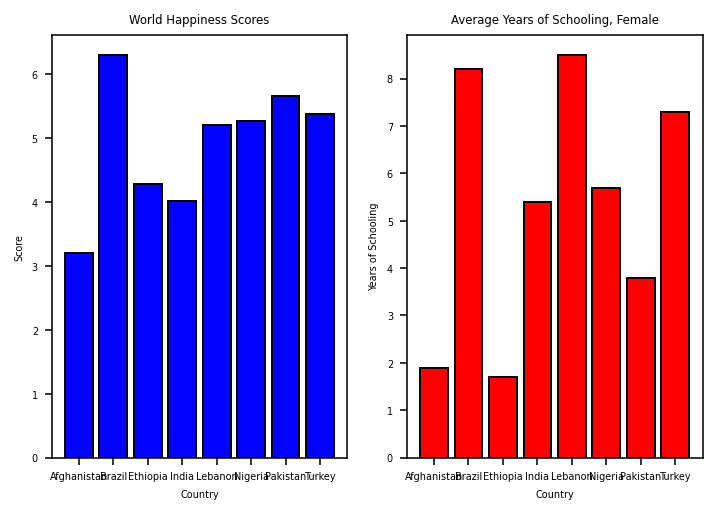

In [28]:
#Altering graph and text size 
plt.rcParams['figure.dpi'] = 140 #<--only wanted my figure to appear larger without changing resolution 
plt.rcParams.update({'font.size':5})

# Define values for the Plot 1 - Happy
x1 =   ['Afghanistan', 'Brazil', 'Ethiopia','India', 'Lebanon', 'Nigeria', 'Pakistan', 'Turkey']
y1 =  [3.203, 6.300, 4.286, 4.015, 5.197, 5.265, 5.653, 5.373]

# Define values for Plot 2 - Schooling
x2 = ['Afghanistan', 'Brazil', 'Ethiopia','India', 'Lebanon', 'Nigeria', 'Pakistan', 'Turkey']
y2 = [1.9,8.2,1.7,5.4,8.5,5.7,3.8,7.3]

# Plot 1 = World Happiness Scores
plt.subplot(1, 2, 1)
plt.bar(x1,y1, color='blue', edgecolor='black')
plt.xlabel ('Country')
plt.ylabel('Score')
plt.title ('World Happiness Scores')

# Plot 2 = Average Years of Schooling, Female
plt.subplot(1, 2, 2)
plt.bar(x2,y2, color = 'red', edgecolor='black')
plt.xlabel ('Country')
plt.ylabel('Years of Schooling')
plt.title ('Average Years of Schooling, Female')

plt.show()
# plt.savefig('subplots with log scale.pdf', dpi=300)

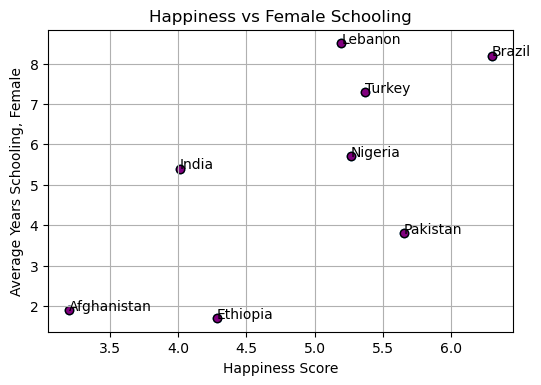

In [29]:
#Altering graph and text size 
plt.rcParams['figure.dpi'] = 100 #<--only wanted my figure to appear larger without changing resolution 
plt.rcParams.update({'font.size':10})

#plotting points with data labels (had to mannually copy info for each point)
y = [1.9,8.2,1.7,5.4,8.5,5.7,3.8,7.3]
x = [3.203, 6.300, 4.286, 4.015, 5.197, 5.265, 5.653, 5.373]
n = ['Afghanistan', 'Brazil', 'Ethiopia','India', 'Lebanon', 'Nigeria', 'Pakistan', 'Turkey']

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n): #<--for loop
    ax.annotate(txt, (x[i], y[i]))

#adding/modifying through the axes, not the plot, so ax.set_xlabel needed
plt.scatter(x,y, c= 'purple', edgecolor='black')
ax.set_xlabel  ('Happiness Score')
ax.set_ylabel ('Average Years Schooling, Female')
ax.set_title ('Happiness vs Female Schooling')
ax.grid(True);

# Summary and Next Steps

### Inital Insights

- Afghanistan and Brazil are consistent across the two datasets (Afghanistan - low, Brazil - high)
- Pakistan and India have inverse results, interesting because of geographic proximity 
- Ethiopia and Lebanon far apart on y-axis, but closer on x-axis

### Possible Next Steps

- Add regression line
- Include either more data points or different groupsings of data points scatter plot